✍ Мы уже изучили один из алгоритмов кластеризации — k-means. Однако он не всегда может помочь нам выделить кластеры. Например, когда данные распределены в форме вытянутых эллипсов, k-means не справляется с кластеризацией:

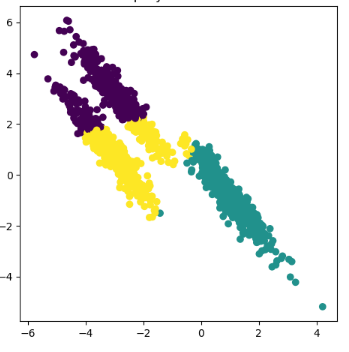

В таком случае в качестве альтернативы можно взять один из алгоритмов кластеризации *EM (Expectation-maximization)* — **модель гауссовой смеси (Gaussian Mixture Model, GMM)**, в которой данные описываются законом нормального распределения. В этом юните мы подробнее изучим этот алгоритм и разберёмся с каждым шагом его реализации.

Эту модель часто используют, к примеру, при детекции кибератак или выявлении нетипичных физиологических паттернов.

Для начала давайте попробуем разобраться с методом интуитивно, а затем перейдём к его математической составляющей.

---

Предположим, что у нас есть набор некоторых объектов и мы знаем, что они получены из нескольких различных распределений Гаусса. Разумеется, знай мы, какие точки из какого распределения Гаусса получены, мы смогли бы использовать их для того, чтобы найти параметры каждого распределения. С другой стороны, если бы мы знали параметры этих распределений Гаусса, то могли бы предположить, к какому распределению относятся рассматриваемые точки.

Таким образом, нам необходимы параметры распределения, чтобы идентифицировать принадлежность точек, и необходимо знать принадлежность точек, чтобы вычислить параметры распределения. Такой парадокс немного напоминает извечный риторический вопрос о курице и яйце. Но если проверить, что возникло раньше — курица или яйцо — мы не сможем, то разобраться с нашей дилеммой нам позволит ЕМ-алгоритм.

---



Рассмотрим принцип реализации данного алгоритма на примере кластеризации нескольких точек, находящихся в одномерном пространстве:

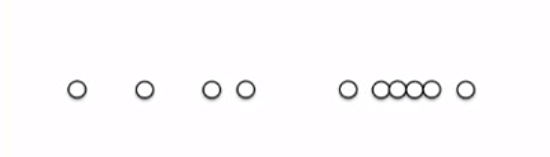

Возьмём два случайно сгенерированных распределения Гаусса (изображены на рисунке ниже синим и жёлтым цветом).

*Примечание: распределение Гаусса (нормальное распределение) обсуждалось ранее в модуле по теории вероятностей.*

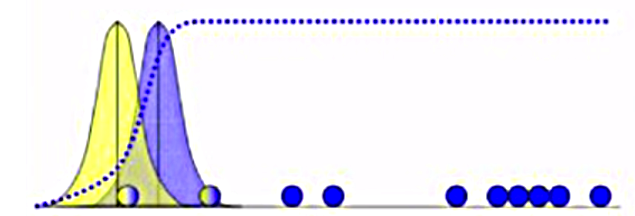

Попытаемся выяснить, с какой вероятностью каждая точка принадлежит к синему или жёлтому распределению. Синей пунктирной линией отображено апостериорное распределение вероятностей принадлежности точек к синему распределению (оно имеет форму сигмоиды и принимает значения от 0 до 1).

Например, рассмотрим точку, закрашенную красным цветом. Скорее всего, с наибольшей вероятностью её можно будет отнести к синему распределению (просто потому, что синее распределение располагается ближе к этой точке).

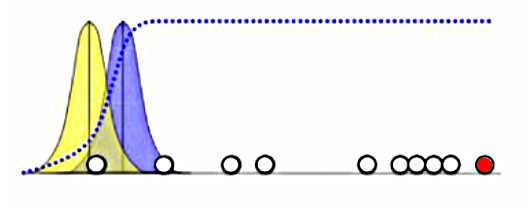

Однако у точки, выделенной красным на следующем рисунке, явно гораздо больше шансов попасть в жёлтое распределение, чем в синее, так как она находится ближе к математическому ожиданию жёлтого распределения.

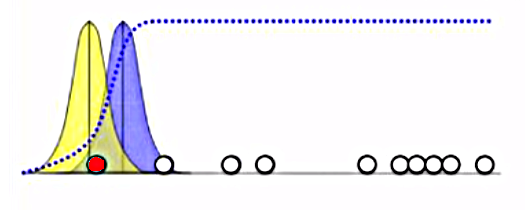

Аналогично оценим вероятность попадания каждой точки в распределения синего и жёлтого цветов и раскрасим точки соответствующе:

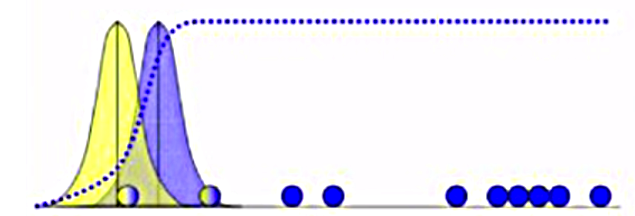

Примечание. Разумеется, по такому рисунку мы не можем хоть с какой-то точностью оценивать вероятности. Пока мы лишь рассматриваем идею, поэтому вычисления оставим за пределами примера и посмотрим на визуализацию результата.

Здесь можно заметить аналогию с k-means, только в k-means мы однозначно относили каждую точку к тому или иному кластеру, а здесь для каждой точки вычисляем вероятности принадлежности к определённым кластерам. Собственно, k-means можно считать упрощённой версией EM-алгоритма.

Итак, каждая точка с какими-то вероятностями принадлежит к жёлтому и синему распределению. Теперь мы сможем использовать значения этих точек для расчёта новых математических ожиданий и дисперсий и построения новых распределений. То есть, по сути, дальше мы изменим распределения так, чтобы они максимально соответствовали точкам, которые мы к ним отнесли.

Можно отметить, что жёлтые точки не будут сильно сдвигать своё распределение, а вот синие будут «перетягивать» вправо:

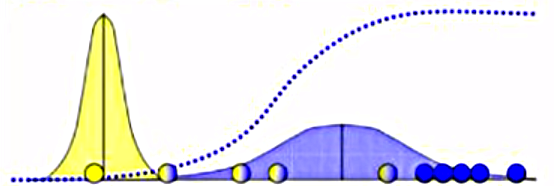

Далее мы ещё раз повторяем описанную ранее процедуру и снова обновляем распределения. После ряда итераций окончательные распределения будут выглядеть так:

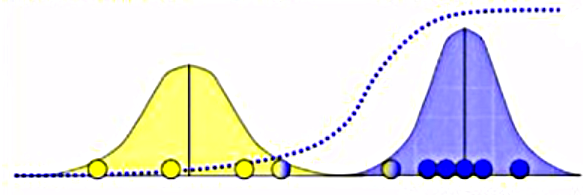

### Таким образом, мы смогли кластеризовать наши точки: первые четыре относятся к жёлтому кластеру, а остальные — к синему. Так и работает EM-алгоритм кластеризации.

Теперь нам необходимо разобраться с математической составляющей данного процесса, но для этого нам придётся вспомнить теорему Байеса. Немного отвлечёмся от задачи кластеризации и решим следующую задачу ↓

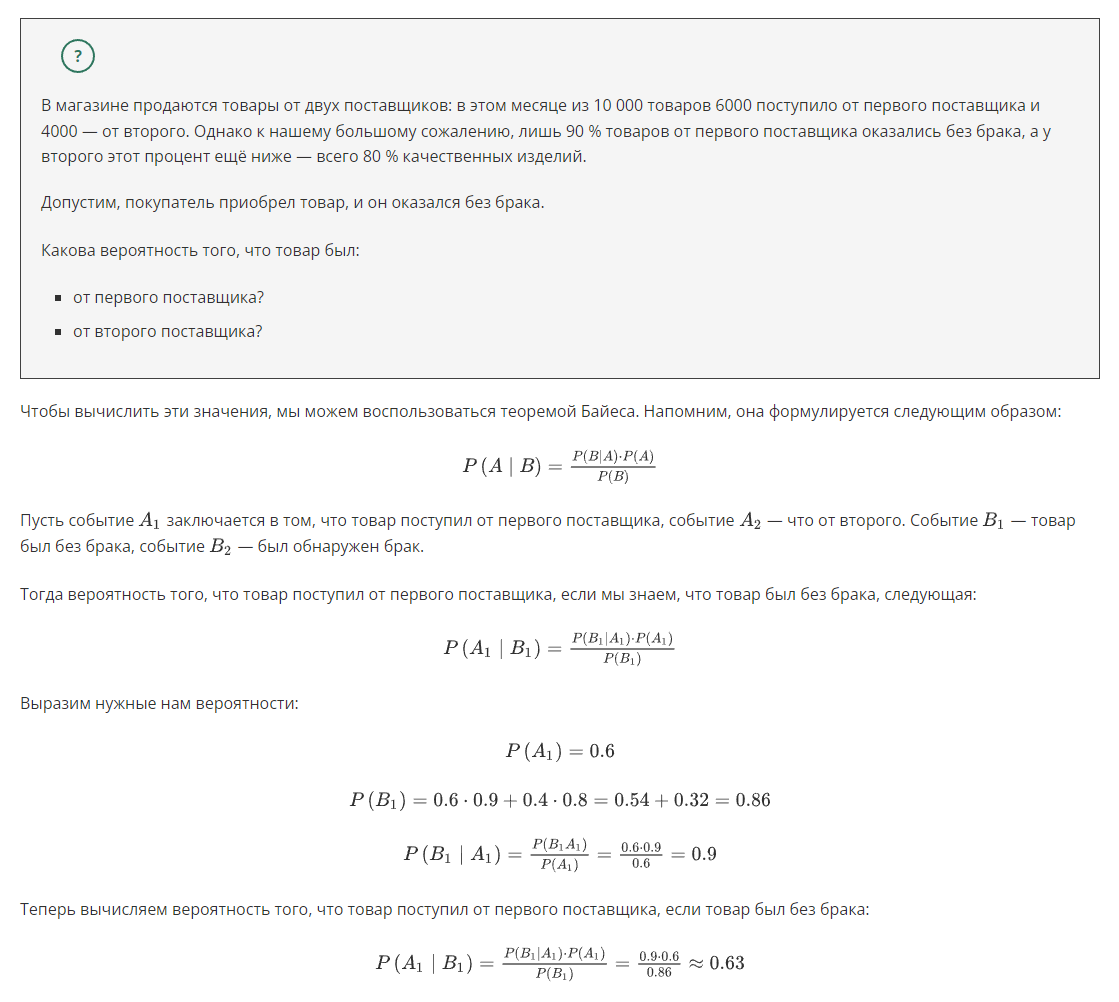

## Задание 3.1

Вычислите вероятность того, что товар поступил от второго поставщика, если товар был без брака. Ответ округлите до двух знаков после точки-разделителя.

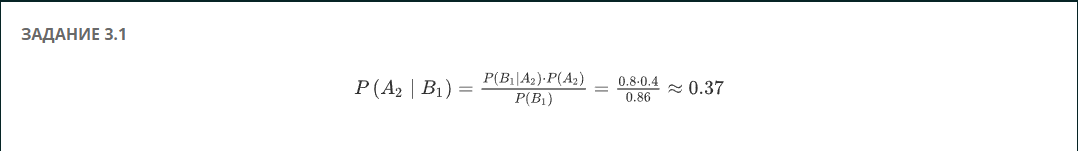

Отлично, в этой задаче нет ничего сложного — переходим к следующей ↓

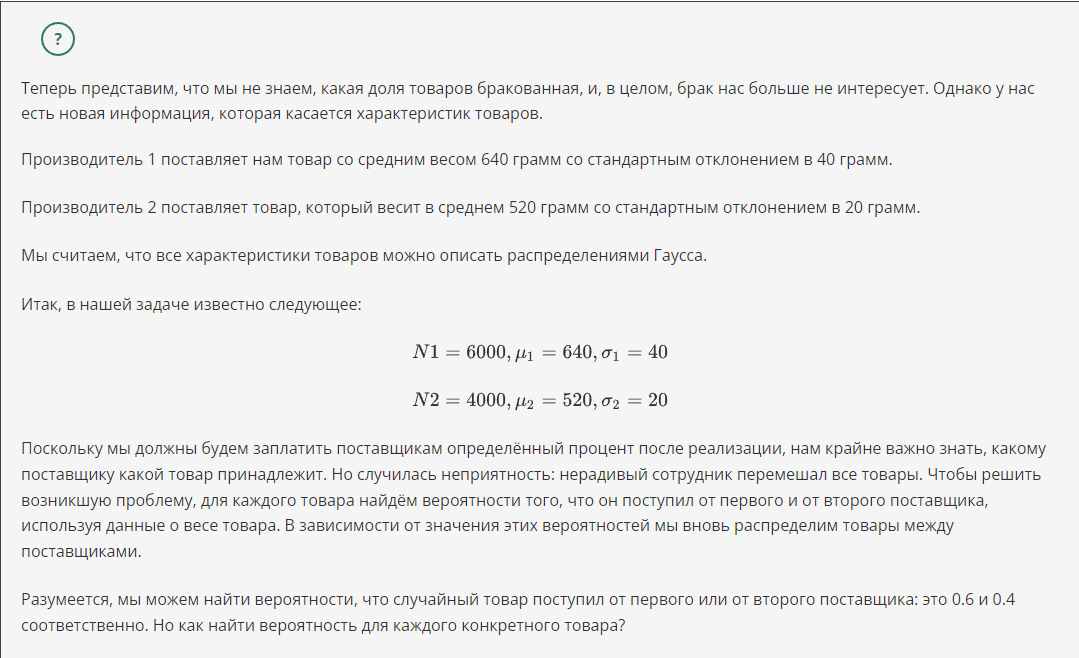
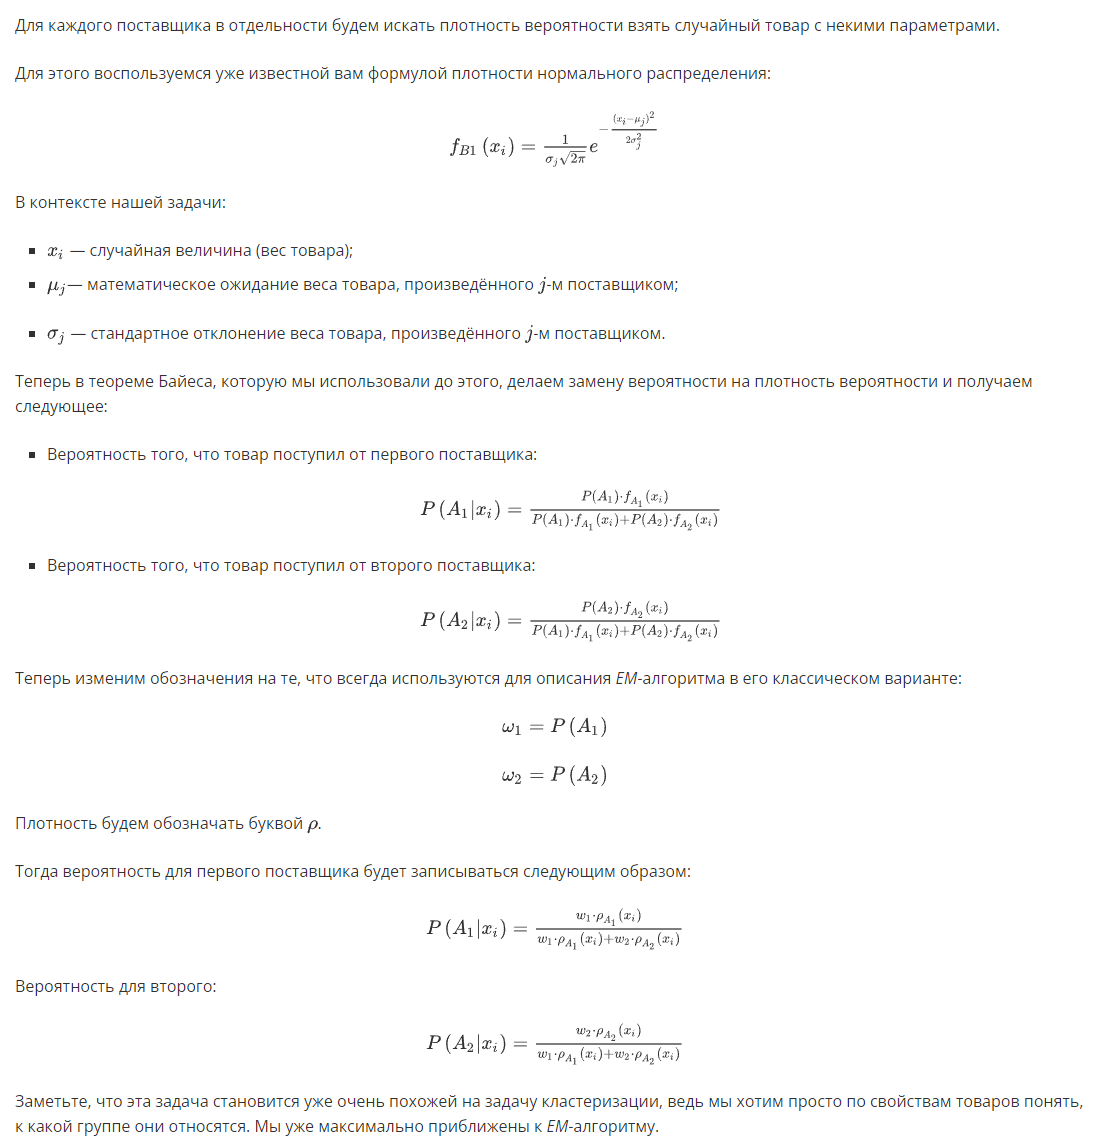

*Пояснение. Здесь и далее мы всё ещё приводим в задаче числовые данные, однако не решаем её из-за сложности «ручного» решения: алгоритм расписывается просто для понимания сути.*

Давайте рассмотрим ещё и двухмерный случай. А что, если у нас два параметра? Не только вес товара, но и, к примеру, его длина?

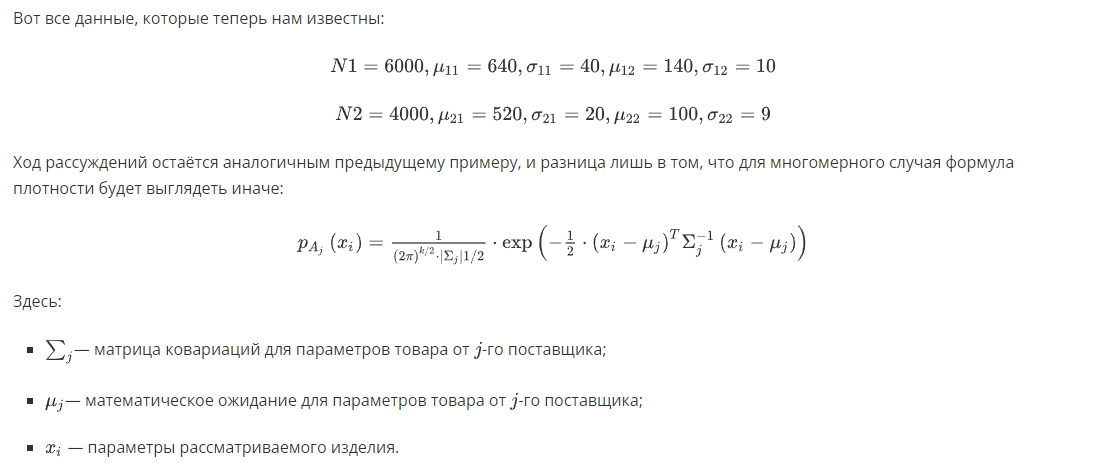

### Резюмируем то, что обсудили выше. Мы расписали, как для случайного объекта можно найти:

+ вероятность того, что он принадлежит к той или иной группе, если мы знаем его параметры;
+ вероятность того, что он принадлежит к определённой группе.

### Усложним нашу задачу до предела. Теперь мы будем знать только следующее:

+ у нас есть отличающиеся товары, которые поступают от двух поставщиков;
+ математические ожидания и стандартные отклонения параметров товаров;
+ общее количество товаров.

Однако главный вопрос не меняется — всё ещё надо понять, как для каждого товара определить, какому поставщику он принадлежит. Здесь нам поможем EM-алгоритм.

## Распишем схему решения данной задачи с помощью этого метода.

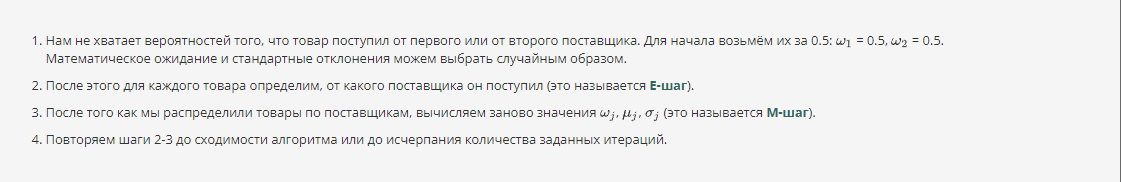

В более общем виде последовательность действий в EM-алгоритме можно сформулировать следующим образом:

1. Выбрать количество кластеров, которое кажется нам оптимальным для наших данных.
2. Случайным образом выбрать параметры распределений в пространстве данных.
3. Для каждой точки набора данных рассчитать вероятность принадлежности к каждому кластеру.
4. Обновить параметры распределений таким образом, чтобы максимизировать вероятность принадлежности точек, отнесённых к кластеру.
5. Повторять шаги 3-4 фиксированное число раз либо до тех пор, пока центроиды не сойдутся.

Теперь сформулируем последовательность реализации EM-алгоритма математически.

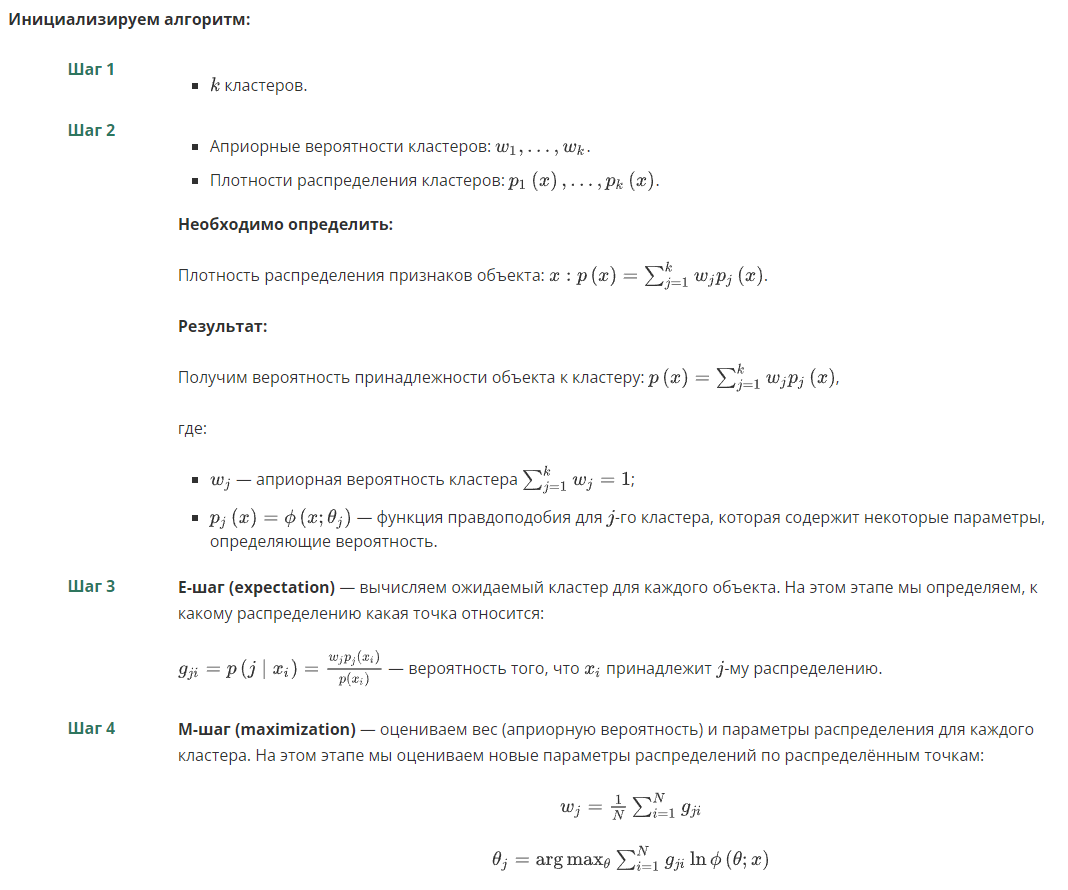

*Пояснение. Данный алгоритм использует метод максимального правдоподобия, который не включён в наш курс. Суть метода максимального правдоподобия заключается в том, что мы подбираем неизвестные параметры так, чтобы вероятность того, что уже произошло, оказалась максимальной, то есть чтобы точки, которые попали в распределение, были в нём с наибольшей вероятностью.*

Почитать подробнее про метод максимального правдоподобия можно здесь или здесь (более кратко и формально).

Визуализацию работы EM-алгоритма можно увидеть ниже:

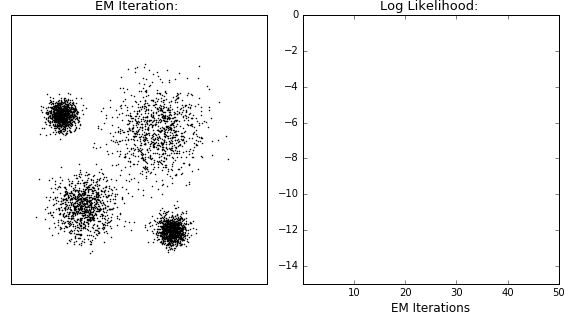

Слева мы видим изменения распределений, а справа — изменение значения логарифмической функции правдоподобия.

### Как мы отмечали ранее, алгоритм EM очень похож на k-means и, по сути, является его упрощённым вариантом. Однако у этих алгоритмов есть различия:

+ кластеры в EM эллиптические, а в k-means — сферические;
+ в EM кластеризация мягкая, а в k-means — жёсткая.

### Для реализации алгоритма в sklearn мы используем GaussianMixture. Для запуска алгоритма GaussianMixture необходимо задать следующие основные параметры:

+ n_components — количество кластеров;
+ random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

Преимущества и недостатки EM-алгоритма

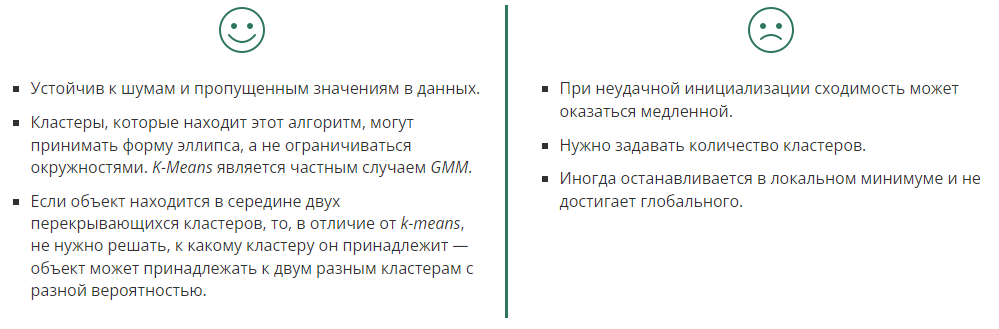

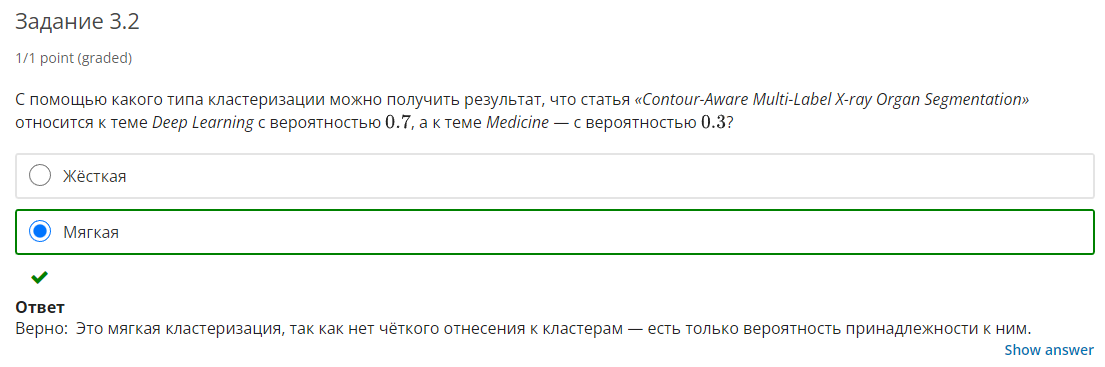

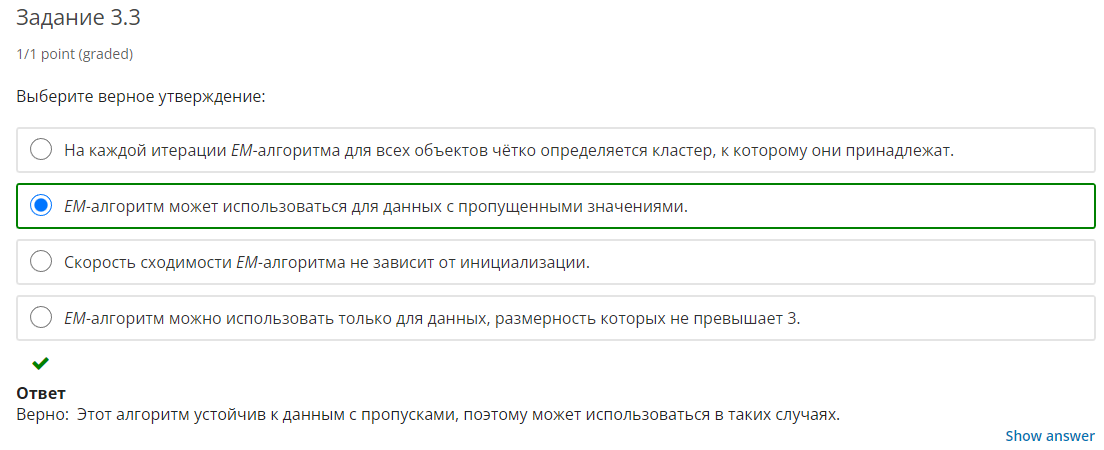

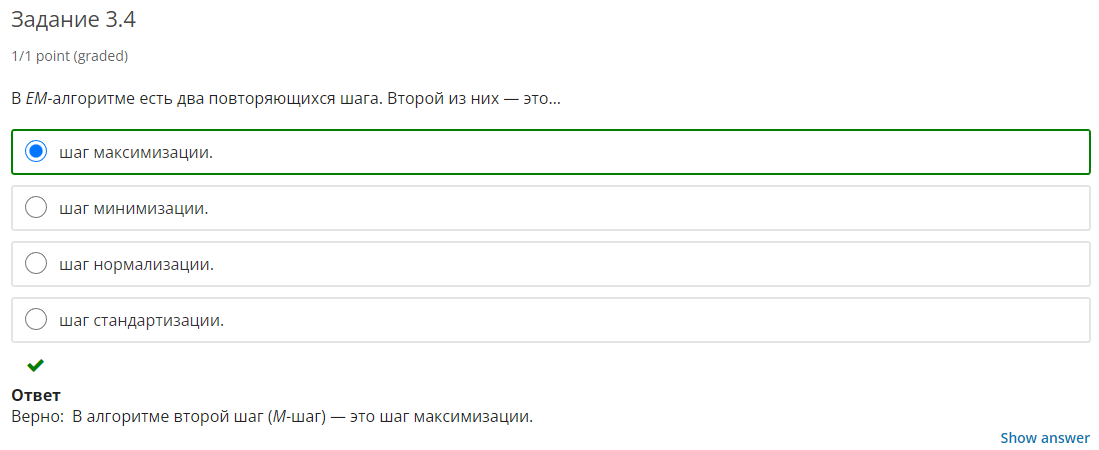

⭐ Прекрасно, мы разобрались с алгоритмом EM, и ваш арсенал пополнился ещё одним методом кластеризации. В следующем юните мы потренируемся применять изученные методы для решения практической задачи →